```
Hex 	RGB
#05085a 	(5,8,90)
#d2d2d2 	(210,210,210)
#6262bc 	(98,98,188)
#b4e9f8 	(180,233,248)
#262525 	(38,37,37)
```

# <span style='color:#262525'> Análise textual da Bíblia </span>

## <span style='color:#6262bc'> Importação do arquivo </span>

In [69]:
%store -r __imp

In [70]:
__imp

The libraries have been loaded!


In [71]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
from wordcloud import WordCloud
import networkx as nx
import itertools
import numpy as np
from PIL import Image
from os import path
import random
import re
from nltk.tokenize import sent_tokenize


In [72]:
stopwords = set(list(nltk.corpus.stopwords.words('portuguese') ) + ['assim','é','antes','porque','pois','vós'])
tokenizer = TreebankWordTokenizer()
re_letra = re.compile('\W')

In [73]:
df_biblia = pd.read_csv('C:/Work/csv/biblia_pontuada.csv')
df_biblia.sg_livro.unique()

array(['gn', 'êx', 'lv', 'nm', 'dt', 'js', 'jz', 'rt', '1sm', '2sm',
       '1rs', '2rs', '1cr', '2cr', 'ed', 'ne', 'et', 'jó', 'sl', 'pv',
       'ec', 'ct', 'is', 'jr', 'lm', 'ez', 'dn', 'os', 'jl', 'am', 'ob',
       'jn', 'mq', 'na', 'hc', 'sf', 'ag', 'zc', 'ml', 'mt', 'mc', 'lc',
       'jo', 'at', 'rm', '1co', '2co', 'gl', 'ef', 'fp', 'cl', '1ts',
       '2ts', '1tm', '2tm', 'tt', 'fm', 'hb', 'tg', '1pe', '2pe', '1jo',
       '2jo', '3jo', 'jd', 'ap'], dtype=object)

In [74]:
LIVROS_DE_PESQUISA = ['rm', '1co', '2co', 'gl', 'ef', 'fp', 'cl', '1ts',
       '2ts', '1tm', '2tm', 'tt', 'fm', 'hb', 'tg', '1pe', '2pe', '1jo',
       '2jo', '3jo']
df_b = df_biblia[(df_biblia.versao == 'acf') &
                (((df_biblia.sg_livro == 'mt') & (df_biblia.capitulo > 4) &  (df_biblia.capitulo < 8)) 
                | (df_biblia.sg_livro.isin(LIVROS_DE_PESQUISA)))]
stopwords = set(list(nltk.corpus.stopwords.words('portuguese') ) + ['assim','é','antes','porque','pois','vós','vosso', 'ora'])
tokenizer = TreebankWordTokenizer()
df_b['palavras'] = df_b.texto.apply(lambda x: [ p.lower() for p in tokenizer.tokenize(x.lower()) if p not in stopwords and p not in punctuation])
df_b.head()


c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,capitulo,sg_livro,texto,versao,versiculo,palavras
102160,5,mt,"E Jesus, vendo a multidão, subiu a um monte, e...",acf,1,"[jesus, vendo, multidão, subiu, monte, assenta..."
102161,5,mt,"E, abrindo a sua boca, os ensinava, dizendo:",acf,2,"[abrindo, boca, ensinava, dizendo]"
102162,5,mt,"Bem-aventurados os pobres de espírito, porque ...",acf,3,"[bem-aventurados, pobres, espírito, reino, céus]"
102163,5,mt,"Bem-aventurados os que choram, porque eles ser...",acf,4,"[bem-aventurados, choram, consolados]"
102164,5,mt,"Bem-aventurados os mansos, porque eles herdarã...",acf,5,"[bem-aventurados, mansos, herdarão, terra]"


### <span style='color:#05085a'>Analise do texto</span>

In [75]:
from cogroo_interface import Cogroo
cogroo = Cogroo.Instance()

texto_completo = '\n'.join(df_b.texto)
doc_b = cogroo.analyze(texto_completo)


In [131]:
pares_verbos = []
pares_subs = []
todas_palavras_add = []
sujeitos = []
for s in doc_b.sentences:
    subs, advs, vs, adjs = [],[],[],[]
    for t in s.tokens:
        if t.lexeme not in stopwords and t.pos in dic_pt:
            if 'verbo' in dict_pt[t.pos]:
                vs.append(t.lemma)
            elif 'substantivo' in dict_pt[t.pos] or t.pos == 'prop':
                subs.append(t.lemma)
            elif 'advérbio' in dict_pt[t.pos]:
                advs.append(t.lemma)
            elif 'adjetivo' in dict_pt[t.pos]:
                adjs.append(t.lemma)
        if 'SUBJ' in t.synchunk:
            sujeitos.append(t.lemma)
        
    todas_palavras_add.extend(vs+subs+advs+adjs)
    pares_verbos.extend( list(itertools.product(vs,subs)))
    pares_subs.extend(list(itertools.product(subs,vs))+ list(itertools.product(sorted(subs),sorted(subs))))

pares_subs =  [p for p in pares_subs if p[0] != p[1]]
    
palavras_add = list(set(todas_palavras_add)



In [133]:
pd.DataFrame(pares_subs,columns = ['substantivo','palavra']).to_csv('C:/Work/csv/subst_doutrina.csv')
pd.DataFrame(pares_verbos,columns = ['verbo','palavra']).to_csv('C:/Work/csv/verbos_doutrina.csv')

In [132]:
sujeitos = [s for s in sujeitos if s not in punctuation and s.lower() not in stopwords]
pd.DataFrame(sujeitos,columns=['suj']).reset_index().groupby('suj').count().sort_values('index',ascending=False)


,index
suj,
todo,195
Deus,183
senhor,81
coisa,69
Cristo,67
irmão,66
homem,61
algum,57
alguém,55


## <span style='color:#6262bc'> Visualização das palavras </span>

### <span style='color:#05085a'>Exploracao inicial</span>

In [79]:
print('%i palavras diferentes.' %len(palavras_add))
print('%i palavras.' %len(todas_palavras_add))
print('Taxa de repetição dos lemas %.2f' %(len(todas_palavras_add)/len(palavras_add)))
df_p = pd.DataFrame(todas_palavras_add,columns=['palavra'])
c = df_p.reset_index().groupby('palavra').count().sort_values('index')
c.columns = ['contador']
c['pc'] = c.contador*100/sum(c.contador)

c.sort_values('contador',ascending=False).head(50)


3091 palavras diferentes.
24067 palavras.
Taxa de repetição dos lemas 7.79


,contador,pc
palavra,,
Deus,649,2.696639
ser,344,1.429343
fazer,327,1.358707
senhor,251,1.042922
Cristo,242,1.005526
dizer,239,0.993061
coisa,237,0.984751
homem,203,0.843479
fé,198,0.822703


In [81]:
df_b['qtd_palavras'] = df_b['palavras'].apply(lambda x: len(x))
df_b.groupby('sg_livro').agg({'qtd_palavras' : ['sum', 'mean']})
print(sum(df_b['qtd_palavras']))

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


qtd_palavras           
                  sum       mean
sg_livro                        
1co              3926   8.983982
1jo               935   8.904762
1pe              1105  10.523810
1tm              1074   9.504425
1ts               823   9.247191
2co              2429   9.451362
2jo               127   9.769231
2pe               716  11.737705
2tm               767   9.240964
2ts               438   9.319149
3jo               121   8.066667
cl                898   9.452632
ef               1324   8.541935
fm                189   7.560000
fp                978   9.403846
gl               1324   8.885906
hb               3009   9.930693
mt               1017   9.162162
rm               3986   9.205543
tg               1080  10.000000
tt                447   9.717391

26713


### <span style='color:#05085a'> Wordcloud dos livros de pesquisa</span>

(-0.5, 1279.5, 928.5, -0.5)

<Figure size 864x720 with 0 Axes>

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


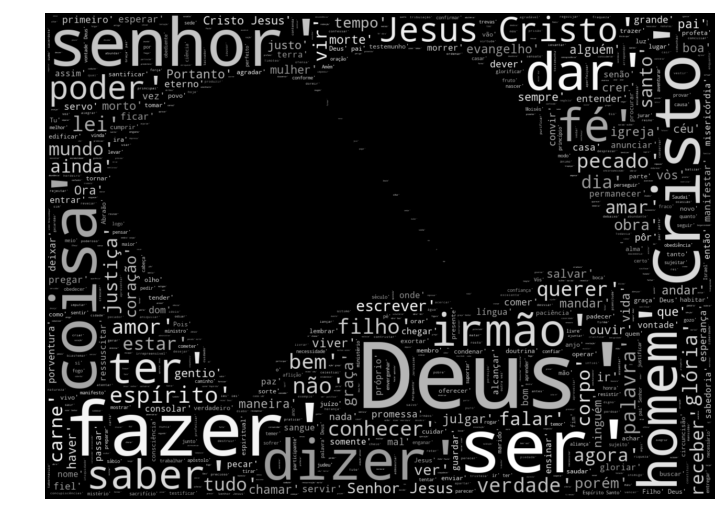

<Figure size 864x720 with 0 Axes>

In [129]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

mask = np.array(Image.open(path.join('C:\\Work\\', "1280px-Open_bible_01_01.png")))

wc = WordCloud(max_words=1000, mask=mask, margin=10,
               random_state=1).generate(str(todas_palavras_add))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("wordcloud_biblia.png")
plt.axis("off")
plt.figure()


### <span style='color:#05085a'> Grafo das palavras</span>

* Palavras no mesmo versículo.<br/> 
* 10 palavras mais relacionadas até a profundidade 2.<br/> 
* Verbos mais próximos


#### Analisando a biblia inteira

In [ ]:
PALAVRAS_INTERESSE = ['deus','senhor','jesus','cristo','pecado','graça','salvação','perdoar']
PALAVRA_PESQUISADA = PALAVRAS_INTERESSE[4]


In [68]:
gvb = nx.Graph()
gvb.add_nodes_from(palavras_add)
df_arestas = pd.DataFrame(pares_verbos,columns=['verbo','palavra']).reset_index().groupby(['verbo','palavra']).count()
df_arestas.columns = ['qtd']
df_arestas.sort_values('qtd',ascending=False).head(20)
gvb.add_weighted_edges_from(df_arestas.reset_index().itertuples(index=False,name=None))


,,qtd
verbo,palavra,
dar,Deus,70
ser,Deus,60
fazer,Deus,57
dar,graça,41
fazer,bem,41
conhecer,Deus,39
ter,Deus,38
fazer,coisa,33
ressuscitar,morto,32


In [126]:
def desenha_grafo(g,palavra_psqd,vai_salvar=False,nm_arq=''):
    cores_arestas =  ['green' if  palavra_psqd in e   else 'blue' for e in list(g.edges)]
    cores_nos =  ['#d2d2d2' if n == palavra_psqd else '#6262bc' for n in list(g.nodes)]
    tam_nos =  [2400 if n == palavra_psqd else 1200 for n in list(g.nodes)]
    pesos = np.array( [e[2]['weight'] for e in list(gsb.edges(data=True))])
    print(pesos)
    pesos = pesos - min(pesos) 
    pesos = (np.divide(pesos, max(pesos) - min(pesos))) * 20
    plt.figure(figsize=(20,20))
    #nx.draw(g,font_family='arial', node_color=cores_nos, with_labels=True,width=pesos)
    nx.draw_circular(g,edge_color=cores_arestas,font_size=24, node_color=cores_nos,node_size=tam_nos, with_labels=True,width=pesos)
    if vai_salvar:
        plt.draw()
        plt.savefig(nm_arq,dpi=1200)

[1 1 4 3 1 1 1 1 1 1 3 1 6 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1]


c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


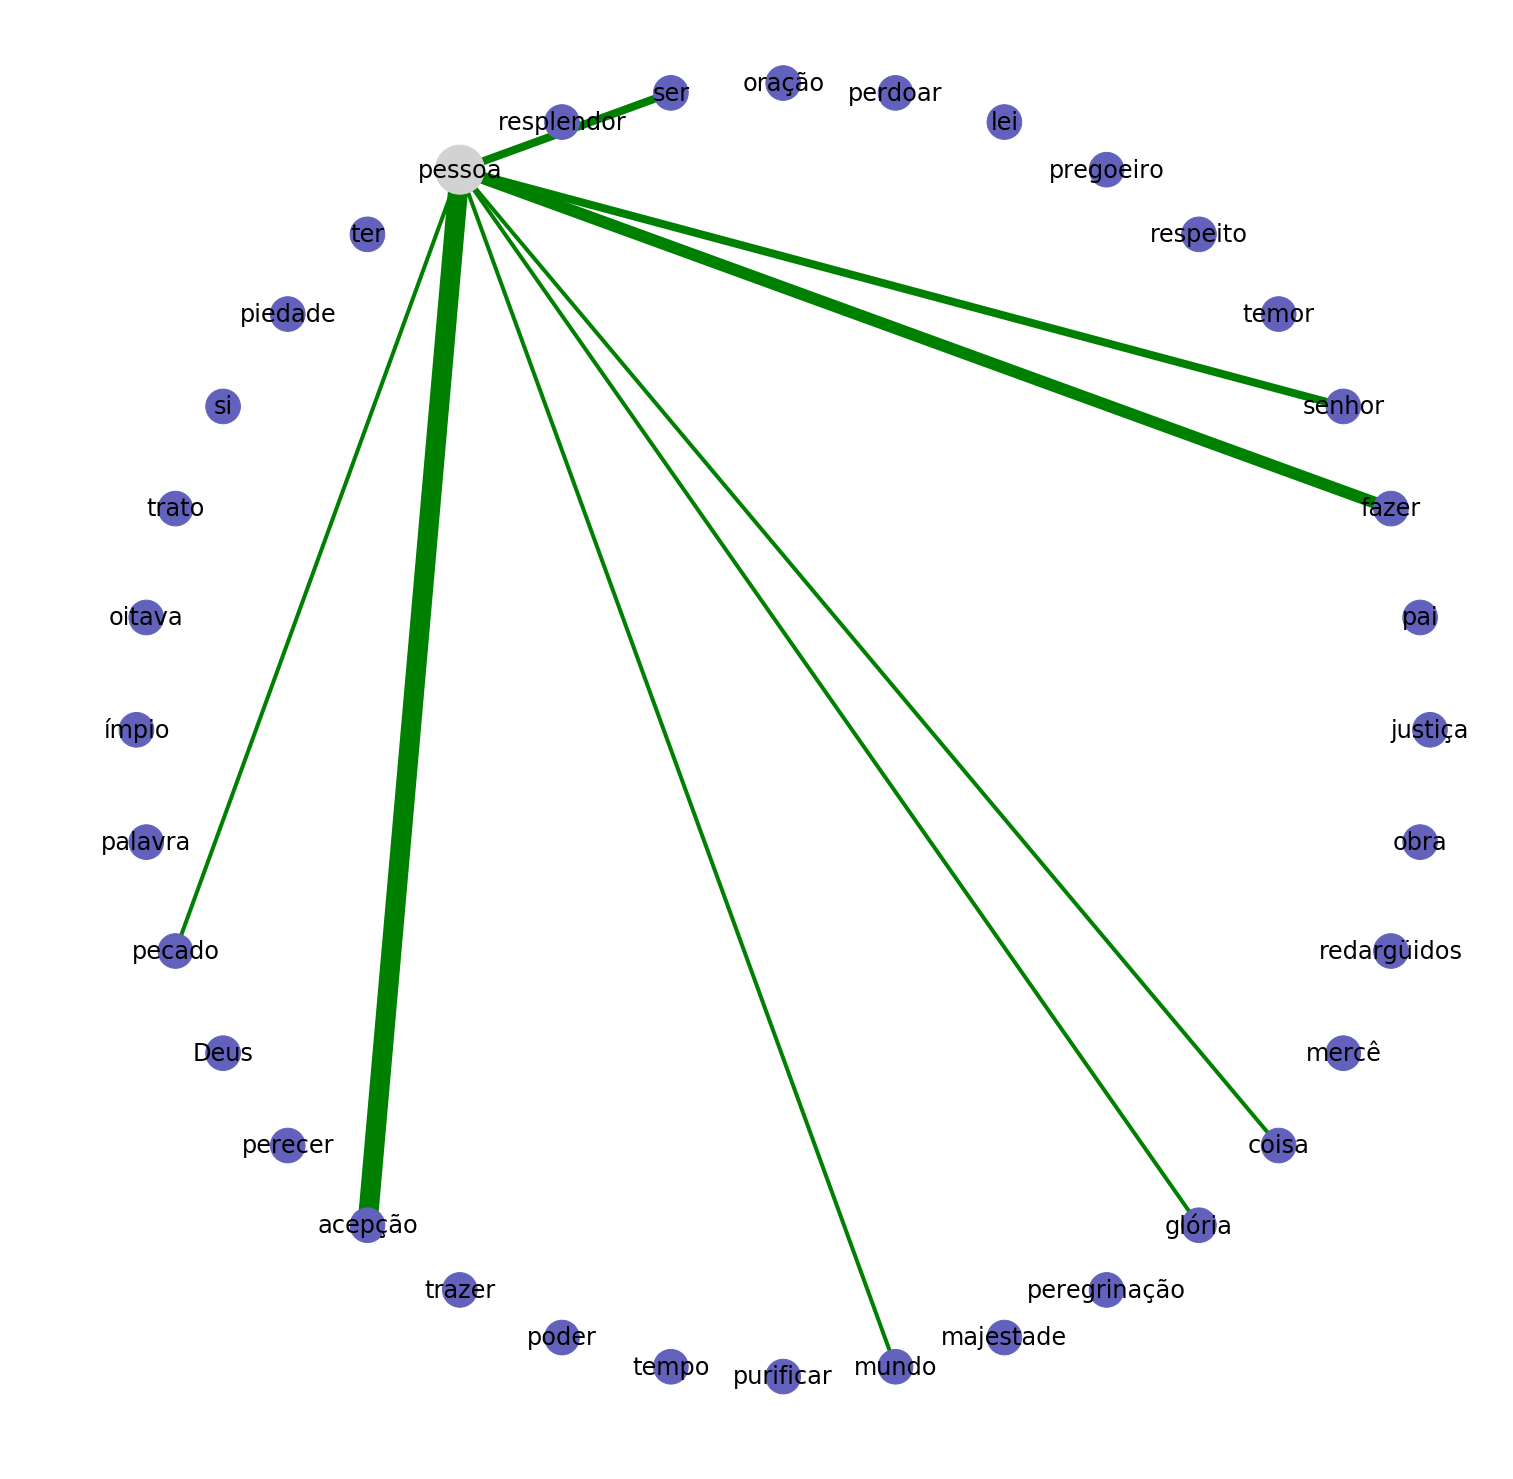

In [130]:
PALAVRA_PESQUISADA = 'pessoa'
QTD_NOS = 50
df_arestas = pd.DataFrame(pares_subs,columns=['substantivo','palavra']).reset_index().groupby(['substantivo','palavra']).count().reset_index()
df_arestas.columns = ['p1','p2','qtd']
df_arestas = df_arestas[(df_arestas.p1 == PALAVRA_PESQUISADA) | (df_arestas.p2 == PALAVRA_PESQUISADA)]
df_grafo = df_arestas.sort_values('qtd',ascending=False).head(QTD_NOS)
gsb = nx.Graph()
gsb.add_nodes_from(set(df_grafo.p2.tolist() + df_grafo.p2.tolist()) )
gsb.add_weighted_edges_from(df_grafo.itertuples(index=False,name=None))
desenha_grafo(gsb,PALAVRA_PESQUISADA)